# Aprenentatge Supervisat - Regressions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PowerTransformer 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
pd.options.display.float_format = '{:.4f}'.format

# Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

### Dataset

In [3]:
# Load the dataframe
df = pd.read_csv('DelayedFlights.csv')

In [4]:
# View the dataset
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0000,1955,2211.0000,2225,WN,...,4.0000,8.0000,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0000,735,1002.0000,1000,WN,...,5.0000,10.0000,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0000,620,804.0000,750,WN,...,3.0000,17.0000,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0000,1755,1959.0000,1925,WN,...,3.0000,10.0000,0,N,0,2.0000,0.0000,0.0000,0.0000,32.0000
4,5,2008,1,3,4,1940.0000,1915,2121.0000,2110,WN,...,4.0000,10.0000,0,N,0,NaN,NaN,NaN,NaN,NaN


Les columnes que conté són:
- **Unnamed**: índex
- **Year**: any del vol
- **Month**: mes del vol
- **DayofMonth**: dia del vol
- **DayOfWeek**: dia de la setmana del vol 
- **DepTime**: hora de sortida del vol real
- **CRSDepTime**: hora de sortida del vol programada
- **ArrTime**: hora d'arribada del vol real
- **CRSArrTime**: hora d'arribada del vol programada
- **UniqueCarrier**: aerolínea
- **FlightNum**: número de vol
- **TailNum**: número de cua de l'avió
- **ActualElapsedTime**: temps de vol real en minuts
- **CRSElapsedTime**: temps de vol programat en minuts
- **AirTime**: temps en l'aire en minuts
- **ArrDelay**: retràs en l'hora d'arribada en minuts
- **DepDelay**: retràs en l'hora de sortida en minuts
- **Origin**: aeroport de sortida
- **Dest**: aeroport de destinació
- **Distance**: distància del vol
- **Taxiln**: temps de taxi de l'arribada en minuts
- **TaxiOut**: temps de taxi de la sortida en minuts
- **Cancelled**: cancel·lació
- **CancellationCode**: codi de cancel·lació
- **Diverted**: desviat
- **CarrierDelay**: retràs atribuït a l'aerolínea en minuts
- **WeatherDelay**: retràs atribuït al clima en minuts
- **NASDelay**: retràs atribuït al sistema d'aviació nacional en minuts
- **SecurityDelay**: retràs atribuït a la seguretat en minuts
- **LateAircraftDelay**: retràs atribuït a l'arribada amb retràs d'un avió en minuts

In [5]:
# Column description
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1936758.0000,NaN,NaN,NaN,3341651.1513,2066064.9575,0.0000,1517452.5000,3242558.0000,4972466.7500,7009727.0000
Year,1936758.0000,NaN,NaN,NaN,2008.0000,0.0000,2008.0000,2008.0000,2008.0000,2008.0000,2008.0000
Month,1936758.0000,NaN,NaN,NaN,6.1111,3.4825,1.0000,3.0000,6.0000,9.0000,12.0000
DayofMonth,1936758.0000,NaN,NaN,NaN,15.7535,8.7763,1.0000,8.0000,16.0000,23.0000,31.0000
DayOfWeek,1936758.0000,NaN,NaN,NaN,3.9848,1.9960,1.0000,2.0000,4.0000,6.0000,7.0000
DepTime,1936758.0000,NaN,NaN,NaN,1518.5341,450.4853,1.0000,1203.0000,1545.0000,1900.0000,2400.0000
CRSDepTime,1936758.0000,NaN,NaN,NaN,1467.4726,424.7668,0.0000,1135.0000,1510.0000,1815.0000,2359.0000
ArrTime,1929648.0000,NaN,NaN,NaN,1610.1406,548.1781,1.0000,1316.0000,1715.0000,2030.0000,2400.0000
CRSArrTime,1936758.0000,NaN,NaN,NaN,1634.2246,464.6347,0.0000,1325.0000,1705.0000,2014.0000,2400.0000
UniqueCarrier,1936758,20,WN,377602,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com podem observar, tenim 5 columnes categòriques: UniqueCarrier amb 20 valors únics, Origin amb 303, Dest amb 304, TailNum amb 5367 i CancellationCode amb 4. Per a poder utilizar tota aquesta informació en un model de regressió, caldria convertir-ho a informació numèrica amb un mètode com one hot encoding o similar. Però això fa augmentar el nostre dataset a més de 6000 variables i se'ns fa difícil treballar-hi. Per això, en aquesta primera part, no considerem les variables categòriques.
A més a més, tampoc tindrem en compte la columan Unnamed que correspon a un índex. Així doncs, elimminarem aquestes columnes per a extreure les features.

In [6]:
# Get the target variable
target = 'ArrDelay'

In [7]:
# Get the dependent variable set
y = df[target]

In [8]:
# Get the numerical features
features = df.select_dtypes(include=np.number).columns.tolist()
features.remove('Unnamed: 0')
features.remove(target)

### Missing values

In [9]:
# Number of missing values per column
df[features].isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
DepDelay                  0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [10]:
# Get the feature columns with nulls
null_cols = df[features+[target]].isnull().sum().rename_axis('name').reset_index(name='nulls')
null_cols = null_cols[null_cols.nulls>0].name.tolist()

In [11]:
# Imputation of missing values with the median of the feature 
for col in null_cols:
    df[col].fillna(df[col].median(), inplace = True)

In [12]:
# Get the independent variable set
X = df[features]

### Feature correlation

In [13]:
df[features + [target]].corr()[target]

Year                    NaN
Month               -0.0012
DayofMonth           0.0041
DayOfWeek            0.0061
DepTime              0.1268
CRSDepTime           0.0445
ArrTime             -0.0511
CRSArrTime           0.0430
FlightNum            0.0611
ActualElapsedTime    0.0684
CRSElapsedTime      -0.0161
AirTime              0.0002
DepDelay             0.9477
Distance            -0.0302
TaxiIn               0.1561
TaxiOut              0.2849
Cancelled           -0.0058
Diverted            -0.0203
CarrierDelay         0.5353
WeatherDelay         0.2779
NASDelay             0.4375
SecurityDelay        0.0112
LateAircraftDelay    0.5192
ArrDelay             1.0000
Name: ArrDelay, dtype: float64

### Feature multicollinearity 

In [14]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
9,ActualElapsedTime,3027.4425
11,AirTime,2785.8932
15,TaxiOut,118.9076
10,CRSElapsedTime,79.3807
0,Year,40.0045
12,DepDelay,39.9158
13,Distance,35.1015
18,CarrierDelay,19.9635
22,LateAircraftDelay,18.8409
14,TaxiIn,17.1235


Observem que tenim un gran número de variables amb un VIF molt elevat. El que farem és eliminar d'una en una les variables amb el VIF més elevat fins a obtindre un coeficient acceptable. Primer de tot eliminarem ActualElapsedTime.

In [15]:
# Remove the feature with the highest VIF
del X['ActualElapsedTime']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
9,CRSElapsedTime,79.2639
10,AirTime,60.9782
0,Year,39.9867
11,DepDelay,39.6405
12,Distance,35.0897
17,CarrierDelay,19.8277
21,LateAircraftDelay,18.7146
19,NASDelay,11.6049
18,WeatherDelay,5.2656
4,DepTime,5.1799


In [16]:
# Remove the feature with the highest VIF
del X['CRSElapsedTime']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
0,Year,37.3700
11,Distance,26.9281
9,AirTime,26.3451
10,DepDelay,24.0453
16,CarrierDelay,12.2855
20,LateAircraftDelay,11.6652
18,NASDelay,6.9220
4,DepTime,5.1798
5,CRSDepTime,5.0965
17,WeatherDelay,3.5304


In [17]:
# Remove the feature with the highest VIF
del X['Year']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
8,AirTime,86.0796
10,Distance,72.0623
3,DepTime,64.0369
4,CRSDepTime,63.7871
6,CRSArrTime,38.4412
9,DepDelay,38.3216
5,ArrTime,16.0311
19,LateAircraftDelay,14.7478
15,CarrierDelay,13.5501
17,NASDelay,7.5166


In [18]:
# Remove the feature with the highest VIF
del X['AirTime']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
3,DepTime,63.8961
4,CRSDepTime,63.7602
6,CRSArrTime,38.3661
8,DepDelay,35.1347
5,ArrTime,15.9201
18,LateAircraftDelay,13.5710
14,CarrierDelay,12.4382
16,NASDelay,6.7305
11,TaxiOut,4.9309
2,DayOfWeek,4.4934


In [19]:
# Remove the feature with the highest VIF
del X['DepTime']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
5,CRSArrTime,37.5255
7,DepDelay,34.9948
3,CRSDepTime,24.6775
4,ArrTime,15.4926
17,LateAircraftDelay,13.5639
13,CarrierDelay,12.4347
15,NASDelay,6.7305
10,TaxiOut,4.9288
2,DayOfWeek,4.4934
1,DayofMonth,3.8982


In [20]:
# Remove the feature with the highest VIF
del X['CRSArrTime']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
6,DepDelay,34.8728
16,LateAircraftDelay,13.5521
3,CRSDepTime,13.0734
12,CarrierDelay,12.4033
4,ArrTime,10.6877
14,NASDelay,6.7119
9,TaxiOut,4.8995
2,DayOfWeek,4.4908
1,DayofMonth,3.8961
0,Month,3.7856


Ara hauriem d'eliminar la feature DepDelay però això ho deixarem per l'últim exercici. Així doncs, haurem eliminat:
- ActualElapsedTime
- CRSElapsedTime
- Year
- AirTime
- DepTime
- CRSArrTime

In [21]:
features = list(set(features) - set({'ActualElapsedTime', 'CRSElapsedTime', 'Year', 'AirTime', 'DepTime', 'CRSArrTime'}))

### Train and test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [23]:
predictions = pd.DataFrame({'Actual': y_test})

In [24]:
model = pd.DataFrame(index=['intercept'] + X.columns.tolist())

In [25]:
metrics = pd.DataFrame(index=['R2', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

In [26]:
feature_importance = pd.DataFrame(index=X.columns.tolist())

### Linear regression

In [27]:
# Create the linear regressor
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the predictions
predictions['Linear'] = y_pred

# Save the intercept and coefficients
model['Linear'] = [regr.intercept_] + regr.coef_.tolist()

# Save the metrics
metrics['Linear'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['Linear'] = abs(regr.coef_)

In [28]:
# View the predictions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
595091,9.0000,7.8372
699277,-3.0000,7.2816
513280,13.0000,7.6456
555111,11.0000,7.8773
1269142,19.0000,13.3803
...,...,...
1417777,23.0000,17.6895
67042,59.0000,58.1246
1311116,32.0000,28.1329
573072,134.0000,134.8619


In [29]:
# The intercept
regr.intercept_

-5.549497420160826

In [30]:
# The coefficients
regr.coef_

array([-4.31677574e-02, -2.06706610e-03, -1.74599259e-02,  2.54805620e-04,
        7.27868466e-06, -6.64069188e-07,  8.37640088e-02, -1.86671180e-03,
        1.28058176e-01,  1.07971239e-01,  8.99987353e+00,  1.16212078e+01,
        9.45587939e-01,  9.37561586e-01,  9.46476247e-01,  1.00145929e+00,
        9.45363075e-01])

In [31]:
# Performance metrics
print('Coefficient of determination:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of determination: 0.9900097524224887
Mean Absolute Error: 3.988308407368491
Mean Squared Error: 32.25956685001029
Root Mean Squared Error: 5.67975059751837


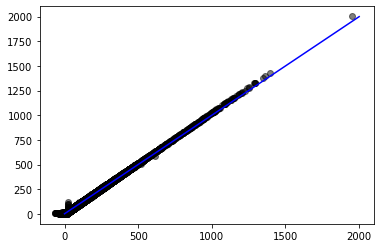

In [32]:
# Plot test vs predicted y
plt.scatter(y_test, y_pred, color='black', alpha=0.5)
plt.plot([0, 2000], [0, 2000], color='blue');

In [33]:
# Feature importance
pd.DataFrame({'Feature': X.columns, 'Importance': abs(regr.coef_)}).sort_values('Importance', ascending=False)

,Feature,Importance
11,Diverted,11.6212
10,Cancelled,8.9999
15,SecurityDelay,1.0015
14,NASDelay,0.9465
12,CarrierDelay,0.9456
16,LateAircraftDelay,0.9454
13,WeatherDelay,0.9376
8,TaxiIn,0.1281
9,TaxiOut,0.1080
6,DepDelay,0.0838


### Linear regression with statsmodel

In [34]:
X_train_const = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train_const).fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.873e+06
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:53:19   Log-Likelihood:            -4.2759e+06
No. Observations:             1355730   AIC:                         8.552e+06
Df Residuals:                 1355712   BIC:                         8.552e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.5495      0.029   -193.477      0.000      -5.606      -5.493
Month                -0.0432      0.001    -30.803      0.000      -0.046      -0.040
DayofMonth           -0.0021      0.001     -3.718      0.000      -0.003      -0.001
DayOfWeek            -0.0175      0.002     -7.152      0.000      -0.022      -0.013
CRSDepTime            0.0003   1.28e-05     19.970      0.000       0.000       0.000
ArrTime            7.279e-06   9.79e-06      0.744      0.457   -1.19e-05    2.65e-05
FlightNum         -6.641e-07    2.7e-06     -0.246      0.806   -5.96e-06    4.63e-06
DepDelay              0.0838      0.000    197.595      0.000       0.083       0.085
Distance             -0.0019   9.22e-06   -202.520      0.000      -0.002      -0.002
TaxiIn                0.1281      0.001    129.358      0.000       0.126       0.130
TaxiOut               0.1080      0.000    226.573      0.000       0.107       0.109
Cancelled             8.9999      0.269     33.509      0.000       8.473       9.526
Diverted             11.6212      0.081    143.975      0.000      11.463      11.779
CarrierDelay          0.9456      0.000   2087.612      0.000       0.945       0.946
WeatherDelay          0.9376      0.001   1857.518      0.000       0.937       0.939
NASDelay              0.9465      0.000   2200.455      0.000       0.946       0.947
SecurityDelay         1.0015      0.003    335.530      0.000       0.996       1.007
LateAircraftDelay     0.9454      0.000   2072.713      0.000       0.944       0.946
==============================================================================
Omnibus:                   642051.151   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4086114.189
Skew:                          -2.221   Prob(JB):                         0.00
Kurtosis:                      10.253   Cond. No.                     1.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ridge regression

In [35]:
# Create the Ridge regressor
regr = Ridge(random_state=1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the predictions
predictions['Ridge'] = y_pred

# Save the intercept and coefficients
model['Ridge'] = [regr.intercept_] + regr.coef_.tolist()

# Save the metrics
metrics['Ridge'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['Ridge'] = abs(regr.coef_)

In [36]:
# View the predictions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
595091,9.0000,7.8372
699277,-3.0000,7.2816
513280,13.0000,7.6457
555111,11.0000,7.8773
1269142,19.0000,13.3803
...,...,...
1417777,23.0000,17.6897
67042,59.0000,58.1246
1311116,32.0000,28.1329
573072,134.0000,134.8619


In [37]:
# The intercept
regr.intercept_

-5.549577888874403

In [38]:
# The coefficients
regr.coef_

array([-4.31650238e-02, -2.06690817e-03, -1.74596666e-02,  2.54786454e-04,
        7.28212338e-06, -6.64165238e-07,  8.37717040e-02, -1.86672697e-03,
        1.28062637e-01,  1.07976780e-01,  8.97941190e+00,  1.16186161e+01,
        9.45579935e-01,  9.37553785e-01,  9.46469068e-01,  1.00145091e+00,
        9.45355050e-01])

In [39]:
# Performance metrics
print('Coefficient of determination:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of determination: 0.9900097476808628
Mean Absolute Error: 3.9883067000163153
Mean Squared Error: 32.259582161221914
Root Mean Squared Error: 5.679751945395319


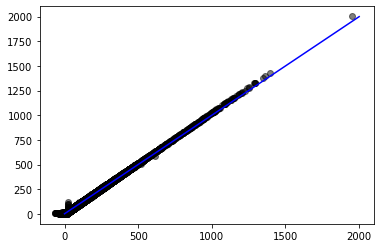

In [40]:
# Plot test vs predicted y
plt.scatter(y_test, y_pred, color='black', alpha=0.5)
plt.plot([0, 2000], [0, 2000], color='blue');

In [41]:
# Feature importance
pd.DataFrame({'Feature': X.columns, 'Importance': abs(regr.coef_)}).sort_values('Importance', ascending=False)

,Feature,Importance
11,Diverted,11.6186
10,Cancelled,8.9794
15,SecurityDelay,1.0015
14,NASDelay,0.9465
12,CarrierDelay,0.9456
16,LateAircraftDelay,0.9454
13,WeatherDelay,0.9376
8,TaxiIn,0.1281
9,TaxiOut,0.1080
6,DepDelay,0.0838


### Lasso regression

In [42]:
# Create the Lasso regressor
regr = Lasso(random_state=1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the predictions
predictions['Lasso'] = y_pred

# Save the intercept and coefficients
model['Lasso'] = [regr.intercept_] + regr.coef_.tolist()

# Save the metrics
metrics['Lasso'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['Lasso'] = abs(regr.coef_)

In [43]:
# View the predictions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
595091,9.0000,8.1030
699277,-3.0000,6.9787
513280,13.0000,7.9639
555111,11.0000,7.8861
1269142,19.0000,13.3573
...,...,...
1417777,23.0000,18.4663
67042,59.0000,56.3559
1311116,32.0000,28.0173
573072,134.0000,134.5330


In [44]:
# The intercept
regr.intercept_

-5.863733249981088

In [45]:
# The coefficients
regr.coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.32146881e-04,
        1.61570318e-05, -2.71584812e-06,  1.22197919e-01, -1.89919765e-03,
        1.13774407e-01,  1.30827297e-01,  0.00000000e+00,  0.00000000e+00,
        9.04957304e-01,  8.96150925e-01,  9.12260982e-01,  5.93380877e-01,
        9.04735366e-01])

In [46]:
# Performance metrics
print('Coefficient of determination:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of determination: 0.9896920329342014
Mean Absolute Error: 4.0176938005120135
Mean Squared Error: 33.2855167068514
Root Mean Squared Error: 5.76936016442477


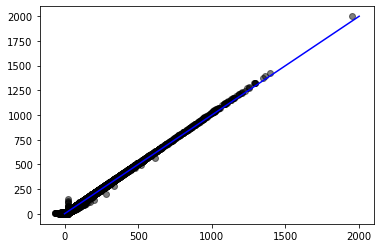

In [47]:
# Plot test vs predicted y
plt.scatter(y_test, y_pred, color='black', alpha=0.5)
plt.plot([0, 2000], [0, 2000], color='blue');

In [48]:
# Feature importance
pd.DataFrame({'Feature': X.columns, 'Importance': abs(regr.coef_)}).sort_values('Importance', ascending=False)

,Feature,Importance
14,NASDelay,0.9123
12,CarrierDelay,0.9050
16,LateAircraftDelay,0.9047
13,WeatherDelay,0.8962
15,SecurityDelay,0.5934
9,TaxiOut,0.1308
6,DepDelay,0.1222
8,TaxiIn,0.1138
7,Distance,0.0019
3,CRSDepTime,0.0001


### ElasticNet regression 

In [49]:
# Create the ElasticNet regressor
regr = ElasticNet(random_state=1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the predictions
predictions['ElasticNet'] = y_pred

# Save the intercept and coefficients
model['ElasticNet'] = [regr.intercept_] + regr.coef_.tolist()

# Save the metrics
metrics['ElasticNet'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['ElasticNet'] = abs(regr.coef_)

In [50]:
# View the predictions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
595091,9.0000,8.0423
699277,-3.0000,7.1478
513280,13.0000,8.0502
555111,11.0000,7.8827
1269142,19.0000,13.2797
...,...,...
1417777,23.0000,18.4524
67042,59.0000,57.1595
1311116,32.0000,27.9762
573072,134.0000,134.5538


In [51]:
# The intercept
regr.intercept_

-6.027418686440477

In [52]:
# The coefficients
regr.coef_

array([-3.03834736e-03, -0.00000000e+00, -0.00000000e+00,  1.37598078e-04,
        8.14222301e-06, -5.62573303e-06,  1.26421566e-01, -1.93108271e-03,
        1.33277565e-01,  1.36488868e-01,  0.00000000e+00,  0.00000000e+00,
        9.00630195e-01,  8.91787938e-01,  9.07172047e-01,  6.52912659e-01,
        9.00340844e-01])

In [53]:
# Performance metrics
print('Coefficient of determination:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of determination: 0.9897253607499008
Mean Absolute Error: 4.016411141500638
Mean Squared Error: 33.17789766236016
Root Mean Squared Error: 5.760025838688587


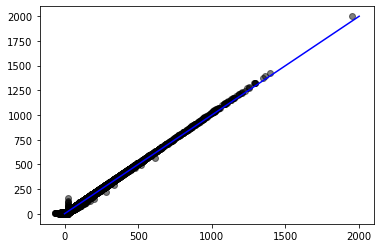

In [54]:
# Plot test vs predicted y
plt.scatter(y_test, y_pred, color='black', alpha=0.5)
plt.plot([0, 2000], [0, 2000], color='blue');

In [55]:
# Feature importance
pd.DataFrame({'Feature': X.columns, 'Importance': abs(regr.coef_)}).sort_values('Importance', ascending=False)

,Feature,Importance
14,NASDelay,0.9072
12,CarrierDelay,0.9006
16,LateAircraftDelay,0.9003
13,WeatherDelay,0.8918
15,SecurityDelay,0.6529
9,TaxiOut,0.1365
8,TaxiIn,0.1333
6,DepDelay,0.1264
0,Month,0.0030
7,Distance,0.0019


### DecisionTree regression

In [56]:
# Create the DecisionTree regressor
regr = DecisionTreeRegressor(random_state=1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the predictions
predictions['DecisionTree'] = y_pred

# Save the metrics
metrics['DecisionTree'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['DecisionTree'] = abs(regr.feature_importances_)

In [57]:
# View the predictions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
595091,9.0000,8.0000
699277,-3.0000,7.0000
513280,13.0000,8.0000
555111,11.0000,8.0000
1269142,19.0000,19.0000
...,...,...
1417777,23.0000,23.0000
67042,59.0000,59.0000
1311116,32.0000,32.0000
573072,134.0000,135.0000


In [58]:
# Performance metrics
print('Coefficient of determination:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of determination: 0.98642338842905
Mean Absolute Error: 2.959146547154354
Mean Squared Error: 43.840315785125675
Root Mean Squared Error: 6.621201989452193


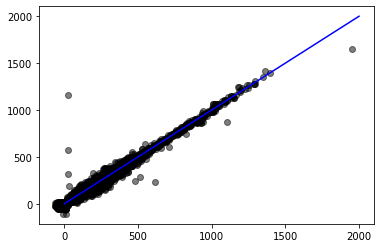

In [59]:
# Plot test vs predicted y
plt.scatter(y_test, y_pred, color='black', alpha=0.5)
plt.plot([0, 2000], [0, 2000], color='blue');

In [60]:
# Feature importance
pd.DataFrame({'Feature': X.columns, 'Importance': abs(regr.feature_importances_)}).sort_values('Importance', ascending=False)

,Feature,Importance
6,DepDelay,0.8846
14,NASDelay,0.0719
9,TaxiOut,0.0127
11,Diverted,0.0076
16,LateAircraftDelay,0.0068
12,CarrierDelay,0.0060
13,WeatherDelay,0.0024
7,Distance,0.0014
10,Cancelled,0.0014
5,FlightNum,0.0010


# Exercici 2

Compara’ls en base al MSE i al R2.

In [61]:
predictions

,Actual,Linear,Ridge,Lasso,ElasticNet,DecisionTree
595091,9.0000,7.8372,7.8372,8.1030,8.0423,8.0000
699277,-3.0000,7.2816,7.2816,6.9787,7.1478,7.0000
513280,13.0000,7.6456,7.6457,7.9639,8.0502,8.0000
555111,11.0000,7.8773,7.8773,7.8861,7.8827,8.0000
1269142,19.0000,13.3803,13.3803,13.3573,13.2797,19.0000
...,...,...,...,...,...,...
1417777,23.0000,17.6895,17.6897,18.4663,18.4524,23.0000
67042,59.0000,58.1246,58.1246,56.3559,57.1595,59.0000
1311116,32.0000,28.1329,28.1329,28.0173,27.9762,32.0000
573072,134.0000,134.8619,134.8619,134.5330,134.5538,135.0000


In [62]:
model

,Linear,Ridge,Lasso,ElasticNet
intercept,-5.5495,-5.5496,-5.8637,-6.0274
Month,-0.0432,-0.0432,-0.0000,-0.0030
DayofMonth,-0.0021,-0.0021,-0.0000,-0.0000
DayOfWeek,-0.0175,-0.0175,-0.0000,-0.0000
CRSDepTime,0.0003,0.0003,0.0001,0.0001
ArrTime,0.0000,0.0000,0.0000,0.0000
FlightNum,-0.0000,-0.0000,-0.0000,-0.0000
DepDelay,0.0838,0.0838,0.1222,0.1264
Distance,-0.0019,-0.0019,-0.0019,-0.0019
TaxiIn,0.1281,0.1281,0.1138,0.1333


In [63]:
feature_importance['median'] = feature_importance.median(axis=1)
feature_importance = feature_importance.sort_values('median', ascending=False)
del feature_importance['median']
feature_importance.style.background_gradient()

,Linear,Ridge,Lasso,ElasticNet,DecisionTree
NASDelay,0.946476,0.946469,0.912261,0.907172,0.071919
CarrierDelay,0.945588,0.945580,0.904957,0.900630,0.006035
LateAircraftDelay,0.945363,0.945355,0.904735,0.900341,0.006817
WeatherDelay,0.937562,0.937554,0.896151,0.891788,0.002442
SecurityDelay,1.001459,1.001451,0.593381,0.652913,0.000126
TaxiIn,0.128058,0.128063,0.113774,0.133278,0.000843
DepDelay,0.083764,0.083772,0.122198,0.126422,0.884583
TaxiOut,0.107971,0.107977,0.130827,0.136489,0.012728
Diverted,11.621208,11.618616,0.000000,0.000000,0.007574
Month,0.043168,0.043165,0.000000,0.003038,0.000473


### Performance

In [64]:
def highlight_max(s, props=''):
    return np.where(s == np.max(s.values), props, '')

In [65]:
def highlight_min(s, props=''):
    return np.where(s == np.min(s.values), props, '')

In [66]:
# Highlight in yellow the best method per metric 
idx = pd.IndexSlice
metrics.style.apply(highlight_max, props='background-color:#ffffb3;', axis=1, subset=idx[idx['R2'], idx[:]])\
             .apply(highlight_min, props='background-color:#ffffb3;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx[:]])

,Linear,Ridge,Lasso,ElasticNet,DecisionTree
R2,0.990010,0.990010,0.989692,0.989725,0.986423
Mean Absolute Error,3.988308,3.988307,4.017694,4.016411,2.959147
Mean Squared Error,32.259567,32.259582,33.285517,33.177898,43.840316
Root Mean Squared Error,5.679751,5.679752,5.769360,5.760026,6.621202


# Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [67]:
# Get the independent variable set
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

### Linear regression with non-default parameters

In [68]:
# Create the linear regressor
regr = LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Linear_PARAM'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

### Ridge regression with non-default parameters

In [69]:
# Create the Ridge regressor
regr = Ridge(random_state=0, fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Ridge_PARAM'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

### Lasso regression with non-default parameters

In [70]:
# Create the Lasso regressor
regr = Lasso(random_state=0, fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Lasso_PARAM'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

### ElasticNet regression with non-default parameters

In [71]:
# Create the ElasticNet regressor
regr = ElasticNet(random_state=0, fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['ElasticNet_PARAM'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [72]:
# Highlight in yellow the best method per metric
# and in green the best method with the non-default parameters
metrics[[col for col in metrics.columns if '_PARAM' in col or not '_' in col]].style\
    .apply(highlight_max, props='background-color:#ffffb3;', axis=1, subset=idx[idx['R2'], idx[:]])\
    .apply(highlight_min, props='background-color:#ffffb3;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx[:]])\
    .apply(highlight_max, props='background-color:#99ff66;', axis=1, subset=idx[idx['R2'], idx['Linear_PARAM':'ElasticNet_PARAM']])\
    .apply(highlight_min, props='background-color:#99ff66;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx['Linear_PARAM':'ElasticNet_PARAM']])

,Linear,Ridge,Lasso,ElasticNet,DecisionTree,Linear_PARAM,Ridge_PARAM,Lasso_PARAM,ElasticNet_PARAM
R2,0.990010,0.990010,0.989692,0.989725,0.986423,0.989747,0.989747,0.989360,0.989435
Mean Absolute Error,3.988308,3.988307,4.017694,4.016411,2.959147,3.982540,3.982537,4.014983,4.008871
Mean Squared Error,32.259567,32.259582,33.285517,33.177898,43.840316,33.106688,33.106700,34.359030,34.114012
Root Mean Squared Error,5.679751,5.679752,5.769360,5.760026,6.621202,5.753841,5.753842,5.861658,5.840720


### DecisionTree regression with non-default parameters

In [73]:
# Get a sample of the dataset
sample = df.sample(100000, random_state = 0)

X = sample[features]
y = sample[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

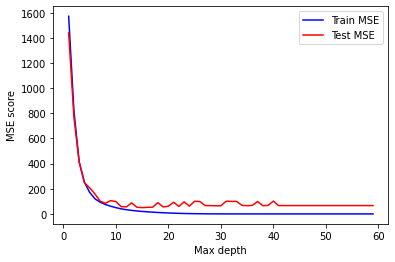

In [74]:
# Explore max_depth
mse_train = []
mse_test = []
max_depths = list(range(1, 60))
for max_depth in max_depths:
    regr = DecisionTreeRegressor(random_state=1, max_depth=max_depth)
    regr.fit(X_train, y_train)
    y_pred_train = regr.predict(X_train)
    y_pred = regr.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred))

line1, = plt.plot(max_depths, mse_train, 'blue', label='Train MSE')
line2, = plt.plot(max_depths, mse_test, 'red', label='Test MSE')
plt.ylabel('MSE score')
plt.xlabel('Max depth')
plt.legend();

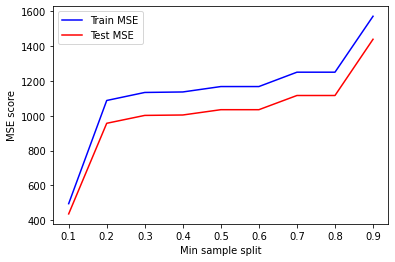

In [75]:
# Explore min_samples_split
mse_train = []
mse_test = []
min_samples_splits = np.arange(0.1, 1, 0.1)
for min_samples_split in min_samples_splits:
    regr = DecisionTreeRegressor(random_state=1, min_samples_split=min_samples_split)
    regr.fit(X_train, y_train)
    y_pred_train = regr.predict(X_train)
    y_pred = regr.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred))

line1, = plt.plot(min_samples_splits, mse_train, 'blue', label='Train MSE')
line2, = plt.plot(min_samples_splits, mse_test, 'red', label='Test MSE')
plt.ylabel('MSE score')
plt.xlabel('Min sample split')
plt.legend();

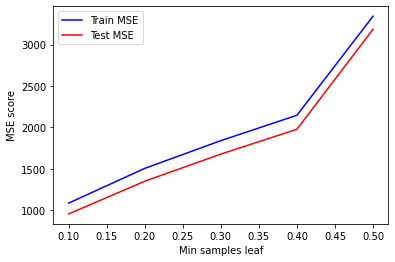

In [76]:
# Explore min_samples_leaf
mse_train = []
mse_test = []
min_samples_leaves = np.arange(0.1, 0.6, 0.1)
for min_samples_leaf in min_samples_leaves:
    regr = DecisionTreeRegressor(random_state=1, min_samples_leaf=min_samples_leaf)
    regr.fit(X_train, y_train)
    y_pred_train = regr.predict(X_train)
    y_pred = regr.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred))

line1, = plt.plot(min_samples_leaves, mse_train, 'blue', label='Train MSE')
line2, = plt.plot(min_samples_leaves, mse_test, 'red', label='Test MSE')
plt.ylabel('MSE score')
plt.xlabel('Min samples leaf')
plt.legend();

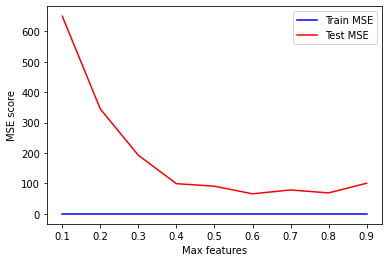

In [77]:
# Explore max_features
mse_train = []
mse_test = []
max_features = np.arange(0.1, 1, 0.1)
for max_feature in max_features:
    regr = DecisionTreeRegressor(random_state=1, max_features=max_feature)
    regr.fit(X_train, y_train)
    y_pred_train = regr.predict(X_train)
    y_pred = regr.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred))

line1, = plt.plot(max_features, mse_train, 'blue', label='Train MSE')
line2, = plt.plot(max_features, mse_test, 'red', label='Test MSE')
plt.ylabel('MSE score')
plt.xlabel('Max features')
plt.legend();

# Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

In [78]:
# Get the independent variable set
X = df[features]
y = df[target]

### Linear regression CV

In [79]:
# Create the linear regressor
regr = LinearRegression()

# Train and make the predictions with CV
y_pred = cross_val_predict(regr, X, y, cv=10)

# Save the metrics
metrics['Linear_CV'] = [r2_score(y, y_pred), mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), np.sqrt(mean_squared_error(y, y_pred))]

### Ridge regression CV

In [80]:
# Create the Ridge regressor
regr = Ridge(random_state=1)

# Train and make the predictions with CV
y_pred = cross_val_predict(regr, X, y, cv=10)

# Save the metrics
metrics['Ridge_CV'] = [r2_score(y, y_pred), mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), np.sqrt(mean_squared_error(y, y_pred))]

### Lasso regression CV

In [81]:
# Create the Lasso regressor
regr = Lasso(random_state=1)

# Train and make the predictions with CV
y_pred = cross_val_predict(regr, X, y, cv=10)

# Save the metrics
metrics['Lasso_CV'] = [r2_score(y, y_pred), mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), np.sqrt(mean_squared_error(y, y_pred))]

### ElasticNet regression CV

In [82]:
# Create the ElasticNet regressor
regr = ElasticNet(random_state=1)

# Train and make the predictions with CV
y_pred = cross_val_predict(regr, X, y, cv=10)

# Save the metrics
metrics['ElasticNet_CV'] = [r2_score(y, y_pred), mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), np.sqrt(mean_squared_error(y, y_pred))]

### DecisionTree regression CV

In [83]:
# Create the DecisionTree regressor
regr = DecisionTreeRegressor(random_state=1)

# Train and make the predictions with CV
y_pred = cross_val_predict(regr, X, y, cv=10)

# Save the metrics
metrics['DecisionTree_CV'] = [r2_score(y, y_pred), mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), np.sqrt(mean_squared_error(y, y_pred))]

### Performance

In [84]:
# Highlight in yellow the best method per metric
# and in green the best method cross validated
metrics[[col for col in metrics.columns if '_CV' in col or not '_' in col]].style\
    .apply(highlight_max, props='background-color:#ffffb3;', axis=1, subset=idx[idx['R2'], idx[:]])\
    .apply(highlight_min, props='background-color:#ffffb3;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx[:]])\
    .apply(highlight_max, props='background-color:#99ff66;', axis=1, subset=idx[idx['R2'], idx['Linear_CV':'DecisionTree_CV']])\
    .apply(highlight_min, props='background-color:#99ff66;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx['Linear_CV':'DecisionTree_CV']])

,Linear,Ridge,Lasso,ElasticNet,DecisionTree,Linear_CV,Ridge_CV,Lasso_CV,ElasticNet_CV,DecisionTree_CV
R2,0.990010,0.990010,0.989692,0.989725,0.986423,0.989950,0.989950,0.989644,0.989679,0.986347
Mean Absolute Error,3.988308,3.988307,4.017694,4.016411,2.959147,3.996558,3.996557,4.018886,4.023712,2.960315
Mean Squared Error,32.259567,32.259582,33.285517,33.177898,43.840316,32.281162,32.281122,33.262457,33.150533,43.852911
Root Mean Squared Error,5.679751,5.679752,5.769360,5.760026,6.621202,5.681651,5.681648,5.767361,5.757650,6.622153


# Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

### Categorical features

In [85]:
# Select categorical features
features_cat = df.select_dtypes(exclude=np.number).columns.tolist()
features_cat_cod = [col + '_cod' for col in features_cat]

# Join numerical and categorical features
features_all = features + features_cat_cod

In [86]:
# Check missing values
df[features_cat].isnull().sum()

UniqueCarrier       0
TailNum             5
Origin              0
Dest                0
CancellationCode    0
dtype: int64

In [87]:
# Fill the missing values of TailNum with the most common category
df['TailNum'].fillna(df.TailNum.mode().squeeze(), inplace=True)

In [88]:
# Encode the categorical features
encoder = LabelEncoder()
for col in features_cat:
    df[col + '_cod']= encoder.fit_transform(df[col])

In [89]:
# Get the independent variable set
X = df[features_all]

In [90]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
21,CancellationCode_cod,50.6763
7,DepDelay,35.7114
9,CRSDepTime,16.0665
3,LateAircraftDelay,13.8197
16,CarrierDelay,12.5887
15,ArrTime,11.6651
12,NASDelay,6.9198
0,TaxiOut,5.2739
17,UniqueCarrier_cod,5.0848
6,DayOfWeek,4.9935


In [91]:
# Remove the feature with the highest VIF
del X['CancellationCode_cod']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
7,DepDelay,34.9282
9,CRSDepTime,14.0023
3,LateAircraftDelay,13.5744
16,CarrierDelay,12.4175
15,ArrTime,11.0212
12,NASDelay,6.7254
0,TaxiOut,4.9379
6,DayOfWeek,4.6613
17,UniqueCarrier_cod,4.6604
20,Dest_cod,4.2783


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [93]:
for col in X.columns:
    if col.endswith('_cod'):
        row = pd.Series({col: np.nan for col in feature_importance.columns}, name=col)
        feature_importance = feature_importance.append(row)

In [94]:
# Create the linear regressor
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Linear_CAT'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['Linear_CAT'] = abs(regr.coef_)

In [95]:
# Create the Ridge regressor
regr = Ridge(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Ridge_CAT'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['Ridge_CAT'] = abs(regr.coef_)

In [96]:
# Create the Lasso regressor
regr = Lasso(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Lasso_CAT'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['Lasso_CAT'] = abs(regr.coef_)

In [97]:
# Create the ElasticNet regressor
regr = ElasticNet(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['ElasticNet_CAT'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['ElasticNet_CAT'] = abs(regr.coef_)

In [98]:
# Create the DecisionTree regressor
regr = DecisionTreeRegressor(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['DecisionTree_CAT'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

# Save the feature importance
feature_importance['DecisionTree_CAT'] = abs(regr.feature_importances_)

In [99]:
feature_importance['median'] = feature_importance.median(axis=1)
feature_importance = feature_importance.sort_values('median', ascending=False)
del feature_importance['median']
feature_importance.style.background_gradient()

,Linear,Ridge,Lasso,ElasticNet,DecisionTree,Linear_CAT,Ridge_CAT,Lasso_CAT,ElasticNet_CAT,DecisionTree_CAT
WeatherDelay,0.937562,0.937554,0.896151,0.891788,0.002442,0.945223,0.945215,0.905804,0.901485,0.006768
LateAircraftDelay,0.945363,0.945355,0.904735,0.900341,0.006817,0.937345,0.937337,0.897145,0.892866,0.002422
NASDelay,0.946476,0.946469,0.912261,0.907172,0.071919,0.107756,0.107762,0.130129,0.135752,0.012693
SecurityDelay,1.001459,1.001451,0.593381,0.652913,0.000126,0.129634,0.129639,0.114830,0.134832,0.000763
TaxiIn,0.128058,0.128063,0.113774,0.133278,0.000843,11.611774,11.609181,0.000000,0.000000,0.007574
TaxiOut,0.107971,0.107977,0.130827,0.136489,0.012728,0.083988,0.083996,0.121175,0.125331,0.884535
DepDelay,0.083764,0.083772,0.122198,0.126422,0.884583,0.017855,0.017854,0.000000,0.000000,0.000260
DayofMonth,0.002067,0.002067,0.000000,0.000000,0.000634,0.946246,0.946239,0.913135,0.908083,0.071890
Diverted,11.621208,11.618616,0.000000,0.000000,0.007574,0.043725,0.043722,0.000000,0.003355,0.000386
CarrierDelay,0.945588,0.945580,0.904957,0.900630,0.006035,0.002072,0.002071,0.000000,0.000000,0.000472


In [100]:
# Highlight in yellow the best method per metric 
# and in green the best method with categorical features
metrics[[col for col in metrics.columns if '_CAT' in col or not '_' in col]].style\
    .apply(highlight_max, props='background-color:#ffffb3;', axis=1, subset=idx[idx['R2'], idx[:]])\
    .apply(highlight_min, props='background-color:#ffffb3;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx[:]])\
    .apply(highlight_max, props='background-color:#99ff66;', axis=1, subset=idx[idx['R2'], idx['Linear_CAT':'DecisionTree_CAT']])\
    .apply(highlight_min, props='background-color:#99ff66;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx['Linear_CAT':'DecisionTree_CAT']])

,Linear,Ridge,Lasso,ElasticNet,DecisionTree,Linear_CAT,Ridge_CAT,Lasso_CAT,ElasticNet_CAT,DecisionTree_CAT
R2,0.990010,0.990010,0.989692,0.989725,0.986423,0.990017,0.990017,0.989701,0.989736,0.987111
Mean Absolute Error,3.988308,3.988307,4.017694,4.016411,2.959147,3.985707,3.985705,4.014506,4.012861,2.869554
Mean Squared Error,32.259567,32.259582,33.285517,33.177898,43.840316,32.237444,32.237459,33.255047,33.143379,41.618884
Root Mean Squared Error,5.679751,5.679752,5.769360,5.760026,6.621202,5.677803,5.677804,5.766719,5.757029,6.451270


### Feature transformation: standaritzation

In [101]:
# Get the independent variable set
X = df[features]

# Standarize features according to its mean and variance
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [102]:
# Create the linear regressor
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Linear_STD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [103]:
# Create the Ridge regressor
regr = Ridge(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Ridge_STD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [104]:
# Create the Lasso regressor
regr = Lasso(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Lasso_STD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [105]:
# Create the ElasticNet regressor
regr = ElasticNet(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['ElasticNet_STD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [106]:
# Create the DecisionTree regressor
regr = DecisionTreeRegressor(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['DecisionTree_STD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [107]:
# Highlight in yellow the best method per metric 
# and in green the best method with standarized features
metrics[[col for col in metrics.columns if '_STD' in col or not '_' in col]].style\
    .apply(highlight_max, props='background-color:#ffffb3;', axis=1, subset=idx[idx['R2'], idx[:]])\
    .apply(highlight_min, props='background-color:#ffffb3;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx[:]])\
    .apply(highlight_max, props='background-color:#99ff66;', axis=1, subset=idx[idx['R2'], idx['Linear_STD':'DecisionTree_STD']])\
    .apply(highlight_min, props='background-color:#99ff66;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx['Linear_STD':'DecisionTree_STD']])

,Linear,Ridge,Lasso,ElasticNet,DecisionTree,Linear_STD,Ridge_STD,Lasso_STD,ElasticNet_STD,DecisionTree_STD
R2,0.990010,0.990010,0.989692,0.989725,0.986423,0.990010,0.990010,0.982395,0.931013,0.986442
Mean Absolute Error,3.988308,3.988307,4.017694,4.016411,2.959147,3.988308,3.988304,5.249622,10.076425,2.962103
Mean Squared Error,32.259567,32.259582,33.285517,33.177898,43.840316,32.259567,32.259577,56.848222,222.765604,43.781709
Root Mean Squared Error,5.679751,5.679752,5.769360,5.760026,6.621202,5.679751,5.679752,7.539776,14.925334,6.616775


### Feature transformation: normalization

In [108]:
# Get the independent variable set
X = df[features]

# Standarize features according to its mean and variance
X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [109]:
# Create the linear regressor
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Linear_NORM'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [110]:
# Create the Ridge regressor
regr = Ridge(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Ridge_NORM'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [111]:
# Create the Lasso regressor
regr = Lasso(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Lasso_NORM'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [112]:
# Create the ElasticNet regressor
regr = ElasticNet(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['ElasticNet_NORM'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [113]:
# Create the DecisionTree regressor
regr = DecisionTreeRegressor(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['DecisionTree_NORM'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [114]:
# Highlight in yellow the best method per metric 
# and in green the best method with normalized features
metrics[[col for col in metrics.columns if '_NORM' in col or not '_' in col]].style\
    .apply(highlight_max, props='background-color:#ffffb3;', axis=1, subset=idx[idx['R2'], idx[:]])\
    .apply(highlight_min, props='background-color:#ffffb3;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx[:]])\
    .apply(highlight_max, props='background-color:#99ff66;', axis=1, subset=idx[idx['R2'], idx['Linear_NORM':'DecisionTree_NORM']])\
    .apply(highlight_min, props='background-color:#99ff66;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx['Linear_NORM':'DecisionTree_NORM']])

,Linear,Ridge,Lasso,ElasticNet,DecisionTree,Linear_NORM,Ridge_NORM,Lasso_NORM,ElasticNet_NORM,DecisionTree_NORM
R2,0.990010,0.990010,0.989692,0.989725,0.986423,0.990010,0.989877,0.233343,0.001533,0.986435
Mean Absolute Error,3.988308,3.988307,4.017694,4.016411,2.959147,3.988308,4.003947,32.776500,37.185624,2.962900
Mean Squared Error,32.259567,32.259582,33.285517,33.177898,43.840316,32.259567,32.688753,2475.615340,3224.155274,43.802182
Root Mean Squared Error,5.679751,5.679752,5.769360,5.760026,6.621202,5.679751,5.717408,49.755556,56.781646,6.618322


### Feature transformation: Gaussian distribution

In [115]:
# Get the independent variable set
X = df[features]

# Standarize features according to its mean and variance
X = PowerTransformer().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [116]:
# Create the linear regressor
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Linear_GAU'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [117]:
# Create the Ridge regressor
regr = Ridge(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Ridge_GAU'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [118]:
# Create the Lasso regressor
regr = Lasso(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Lasso_GAU'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [119]:
# Create the ElasticNet regressor
regr = ElasticNet(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['ElasticNet_GAU'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [120]:
# Create the DecisionTree regressor
regr = DecisionTreeRegressor(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['DecisionTree_GAU'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [121]:
# Highlight in yellow the best method per metric 
# and in green the best method with gaussian-like distributed features
metrics[[col for col in metrics.columns if '_GAU' in col or not '_' in col]].style\
    .apply(highlight_max, props='background-color:#ffffb3;', axis=1, subset=idx[idx['R2'], idx[:]])\
    .apply(highlight_min, props='background-color:#ffffb3;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx[:]])\
    .apply(highlight_max, props='background-color:#99ff66;', axis=1, subset=idx[idx['R2'], idx['Linear_GAU':'DecisionTree_GAU']])\
    .apply(highlight_min, props='background-color:#99ff66;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx['Linear_GAU':'DecisionTree_GAU']])

,Linear,Ridge,Lasso,ElasticNet,DecisionTree,Linear_GAU,Ridge_GAU,Lasso_GAU,ElasticNet_GAU,DecisionTree_GAU
R2,0.990010,0.990010,0.989692,0.989725,0.986423,0.623717,0.623717,0.618142,0.544334,0.985708
Mean Absolute Error,3.988308,3.988307,4.017694,4.016411,2.959147,20.917925,20.917916,20.812625,20.321194,3.059522
Mean Squared Error,32.259567,32.259582,33.285517,33.177898,43.840316,1215.057801,1215.057809,1233.058947,1471.395348,46.151414
Root Mean Squared Error,5.679751,5.679752,5.769360,5.760026,6.621202,34.857679,34.857679,35.114939,38.358771,6.793483


### Feature selection: PCA

In [122]:
# Get the independent variable set
X = df[features]

# Standarize features
X = StandardScaler().fit_transform(X)

# Principal Component Analysys
pca = PCA(n_components=0.9)
X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

[0.11164453 0.08737531 0.08547173 0.07967156 0.06381367 0.06297319
 0.0593401  0.0591998  0.0587685  0.0584257  0.05788764 0.05608647
 0.05423756 0.03780488]


In [123]:
# Create the linear regressor
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Linear_PCA'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [124]:
# Create the Ridge regressor
regr = Ridge(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Ridge_PCA'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [125]:
# Create the Lasso regressor
regr = Lasso(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Lasso_PCA'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [126]:
# Create the ElasticNet regressor
regr = ElasticNet(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['ElasticNet_PCA'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [127]:
# Create the DecisionTree regressor
regr = DecisionTreeRegressor(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['DecisionTree_PCA'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

In [128]:
# Highlight in yellow the best method per metric 
# and in green the best method with gaussian-like distributed features
metrics[[col for col in metrics.columns if '_PCA' in col or not '_' in col]].style\
    .apply(highlight_max, props='background-color:#ffffb3;', axis=1, subset=idx[idx['R2'], idx[:]])\
    .apply(highlight_min, props='background-color:#ffffb3;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx[:]])\
    .apply(highlight_max, props='background-color:#99ff66;', axis=1, subset=idx[idx['R2'], idx['Linear_PCA':'DecisionTree_PCA']])\
    .apply(highlight_min, props='background-color:#99ff66;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx['Linear_PCA':'DecisionTree_PCA']])

,Linear,Ridge,Lasso,ElasticNet,DecisionTree,Linear_PCA,Ridge_PCA,Lasso_PCA,ElasticNet_PCA,DecisionTree_PCA
R2,0.990010,0.990010,0.989692,0.989725,0.986423,0.976700,0.976700,0.973493,0.928705,0.963658
Mean Absolute Error,3.988308,3.988307,4.017694,4.016411,2.959147,6.102400,6.102400,6.601798,10.292369,7.949469
Mean Squared Error,32.259567,32.259582,33.285517,33.177898,43.840316,75.238925,75.238923,85.594301,230.218586,117.350985
Root Mean Squared Error,5.679751,5.679752,5.769360,5.760026,6.621202,8.674037,8.674037,9.251719,15.172956,10.832866


# Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [129]:
X = df[features]

# Remove DepDelay and its sources
X = X.drop(['DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

### LinearRegression without DepDelay

In [131]:
# Create the Linear regressor
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Linear_DD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

### Ridge regression without DepDelay

In [132]:
# Create the Ridge regressor
regr = Ridge()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Ridge_DD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

### Lasso regression without DepDelay

In [133]:
# Create the Lasso regressor
regr = Lasso()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['Lasso_DD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

### ElasticNet regression without DepDelay

In [134]:
# Create the linear regressor
regr = ElasticNet()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['ElasticNet_DD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

### DecisionTree regression without DepDelay

In [135]:
# Create the DecisionTree regressor
regr = DecisionTreeRegressor()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Save the metrics
metrics['DecisionTree_DD'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]

### Performance

In [136]:
# Highlight in yellow the best method per metric 
# and in green the best method without DepDelay
metrics.style.apply(highlight_max, props='background-color:#ffffb3;', axis=1, subset=idx[idx['R2'], idx[:]])\
             .apply(highlight_min, props='background-color:#ffffb3;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx[:]])\
             .apply(highlight_max, props='background-color:#99ff66;', axis=1, subset=idx[idx['R2'], idx['Linear_DD':'DecisionTree_DD']])\
             .apply(highlight_min, props='background-color:#99ff66;', axis=1, subset=idx[idx['Mean Absolute Error':'Root Mean Squared Error'], idx['Linear_DD':'DecisionTree_DD']])

,Linear,Ridge,Lasso,ElasticNet,DecisionTree,Linear_PARAM,Ridge_PARAM,Lasso_PARAM,ElasticNet_PARAM,Linear_CV,Ridge_CV,Lasso_CV,ElasticNet_CV,DecisionTree_CV,Linear_CAT,Ridge_CAT,Lasso_CAT,ElasticNet_CAT,DecisionTree_CAT,Linear_STD,Ridge_STD,Lasso_STD,ElasticNet_STD,DecisionTree_STD,Linear_NORM,Ridge_NORM,Lasso_NORM,ElasticNet_NORM,DecisionTree_NORM,Linear_GAU,Ridge_GAU,Lasso_GAU,ElasticNet_GAU,DecisionTree_GAU,Linear_PCA,Ridge_PCA,Lasso_PCA,ElasticNet_PCA,DecisionTree_PCA,Linear_DD,Ridge_DD,Lasso_DD,ElasticNet_DD,DecisionTree_DD
R2,0.990010,0.990010,0.989692,0.989725,0.986423,0.989747,0.989747,0.989360,0.989435,0.989950,0.989950,0.989644,0.989679,0.986347,0.990017,0.990017,0.989701,0.989736,0.987111,0.990010,0.990010,0.982395,0.931013,0.986442,0.990010,0.989877,0.233343,0.001533,0.986435,0.623717,0.623717,0.618142,0.544334,0.985708,0.976700,0.976700,0.973493,0.928705,0.963658,0.113629,0.113629,0.113063,0.113088,0.676784
Mean Absolute Error,3.988308,3.988307,4.017694,4.016411,2.959147,3.982540,3.982537,4.014983,4.008871,3.996558,3.996557,4.018886,4.023712,2.960315,3.985707,3.985705,4.014506,4.012861,2.869554,3.988308,3.988304,5.249622,10.076425,2.962103,3.988308,4.003947,32.776500,37.185624,2.962900,20.917925,20.917916,20.812625,20.321194,3.059522,6.102400,6.102400,6.601798,10.292369,7.949469,34.075743,34.075725,34.072082,34.072227,16.945643
Mean Squared Error,32.259567,32.259582,33.285517,33.177898,43.840316,33.106688,33.106700,34.359030,34.114012,32.281162,32.281122,33.262457,33.150533,43.852911,32.237444,32.237459,33.255047,33.143379,41.618884,32.259567,32.259577,56.848222,222.765604,43.781709,32.259567,32.688753,2475.615340,3224.155274,43.802182,1215.057801,1215.057809,1233.058947,1471.395348,46.151414,75.238925,75.238923,85.594301,230.218586,117.350985,2862.185543,2862.185493,2864.014480,2863.932040,1043.697638
Root Mean Squared Error,5.679751,5.679752,5.769360,5.760026,6.621202,5.753841,5.753842,5.861658,5.840720,5.681651,5.681648,5.767361,5.757650,6.622153,5.677803,5.677804,5.766719,5.757029,6.451270,5.679751,5.679752,7.539776,14.925334,6.616775,5.679751,5.717408,49.755556,56.781646,6.618322,34.857679,34.857679,35.114939,38.358771,6.793483,8.674037,8.674037,9.251719,15.172956,10.832866,53.499398,53.499397,53.516488,53.515718,32.306310


Veiem que si eliminem el DepDelay i totes les seves fonts (CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay) només l'arbre de decisió és capaç de predir ArrDelay amb un R2 de 0.68, mentres que la resta de regressors (Lineal, Ridge, Lasso i Elasticnet) es queden al voltant de 0.11, pràcticament sense associació.